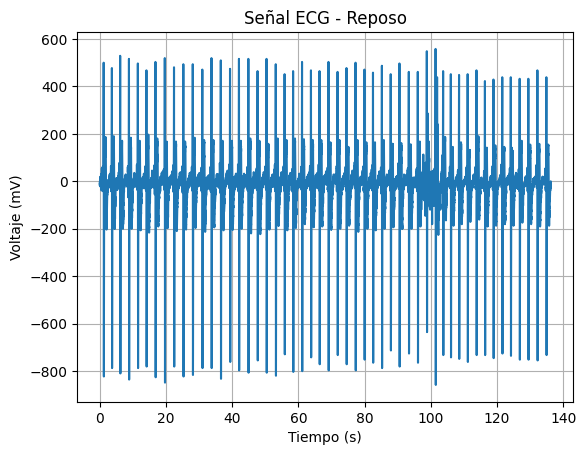

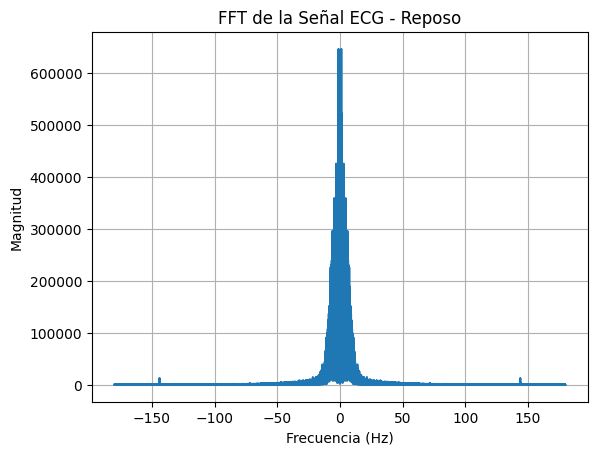

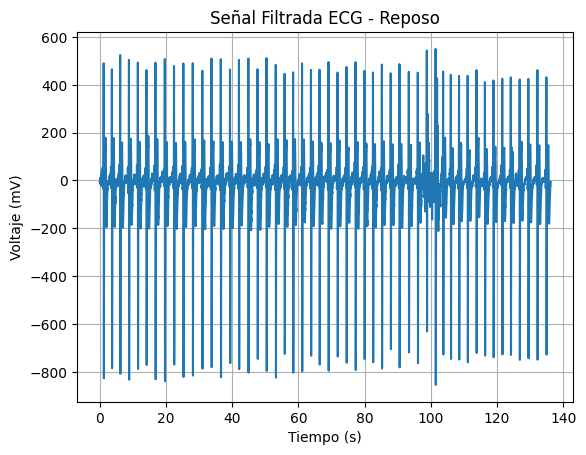

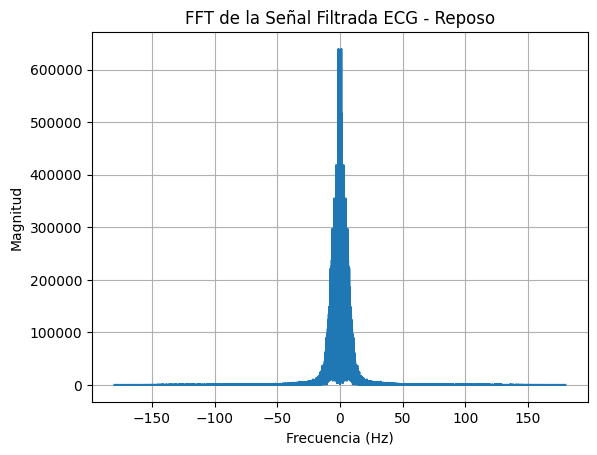

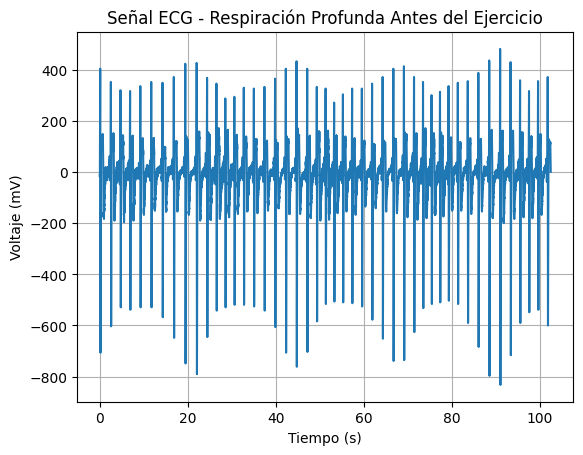

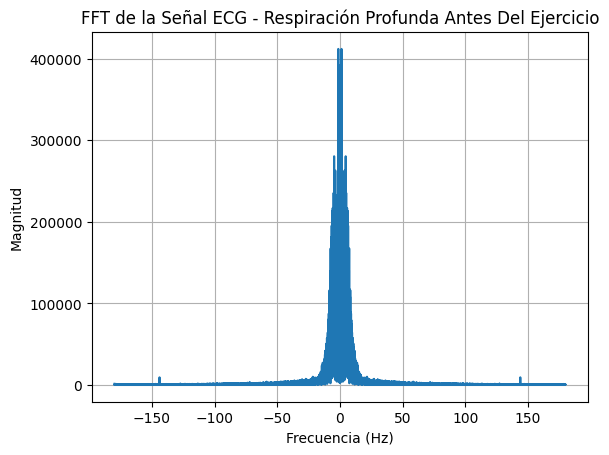

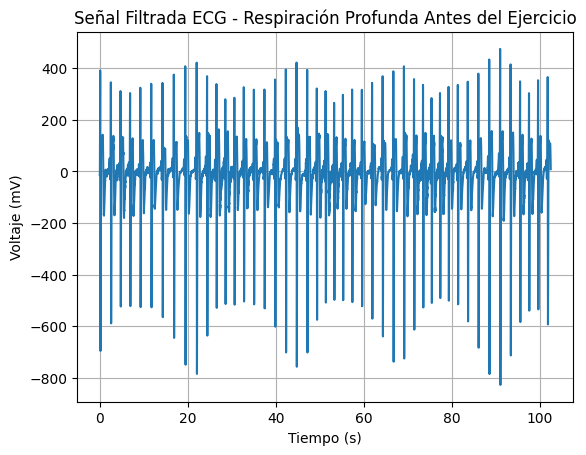

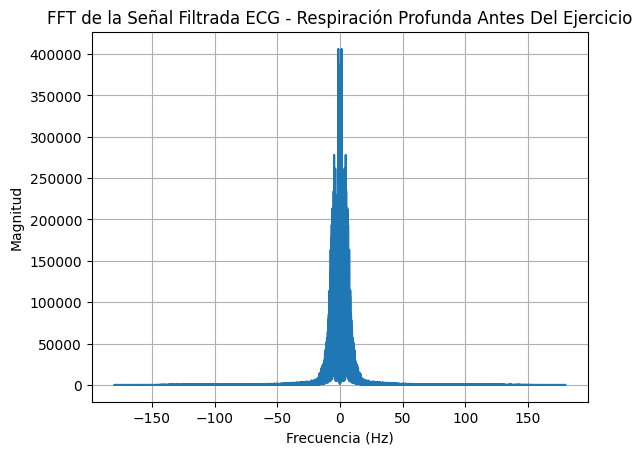

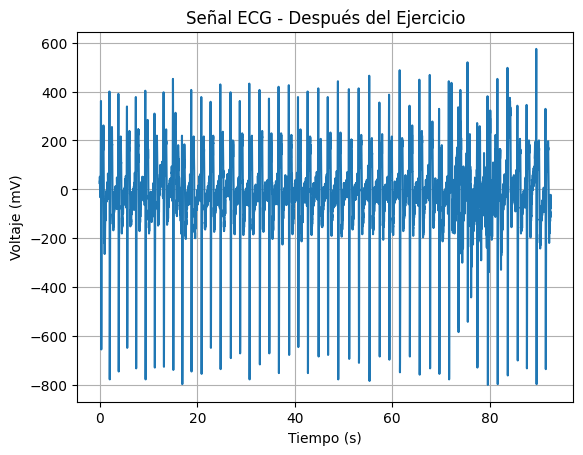

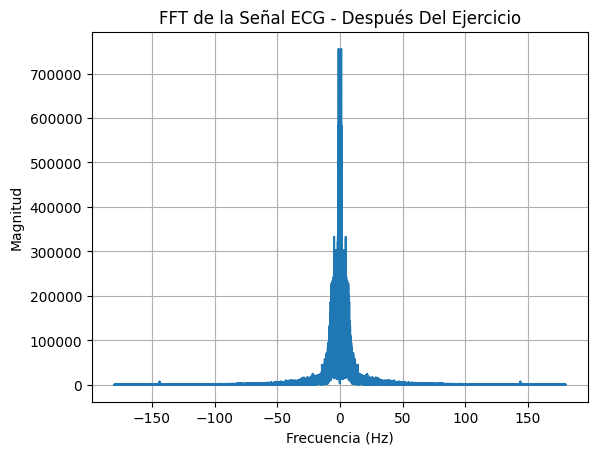

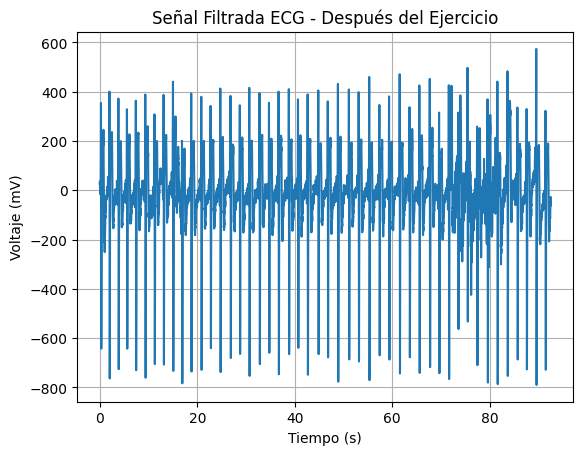

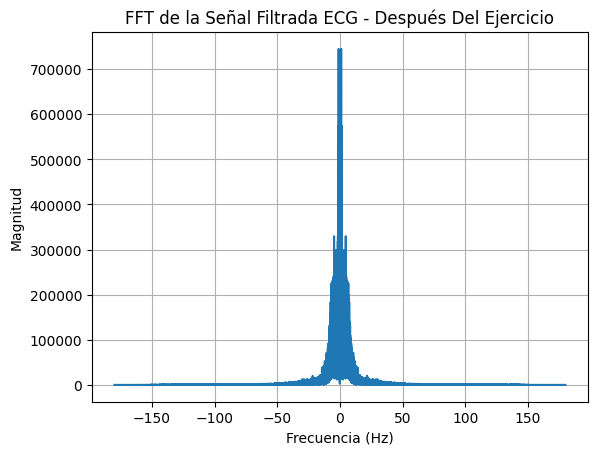

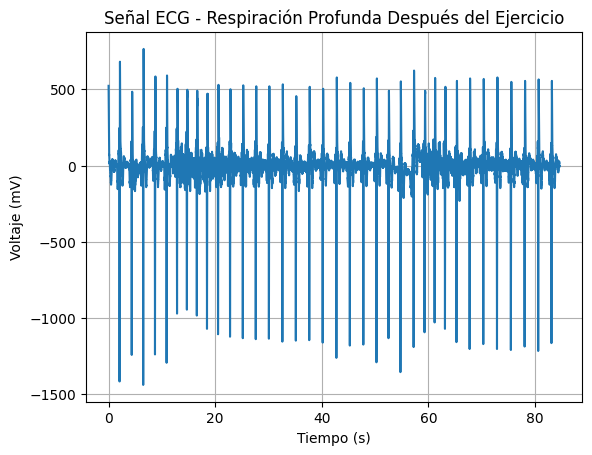

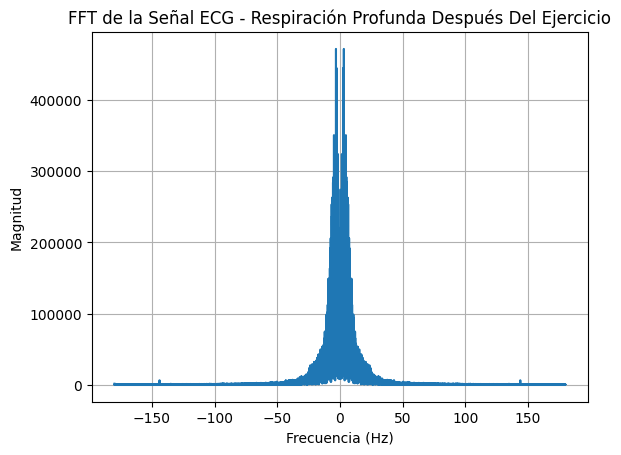

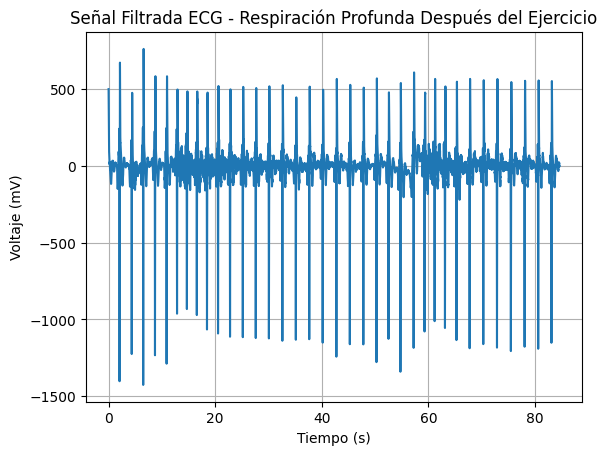

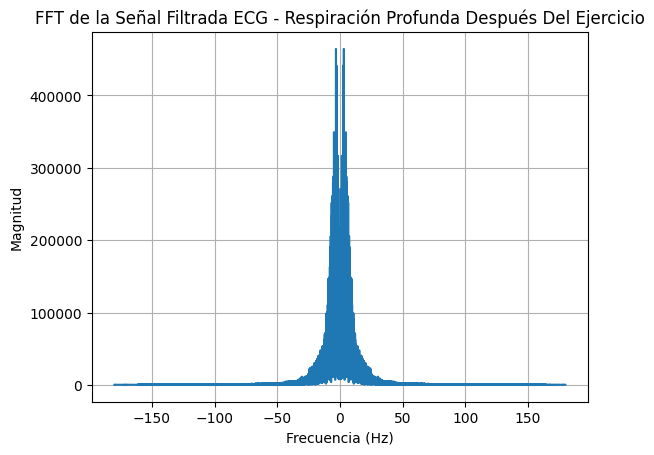

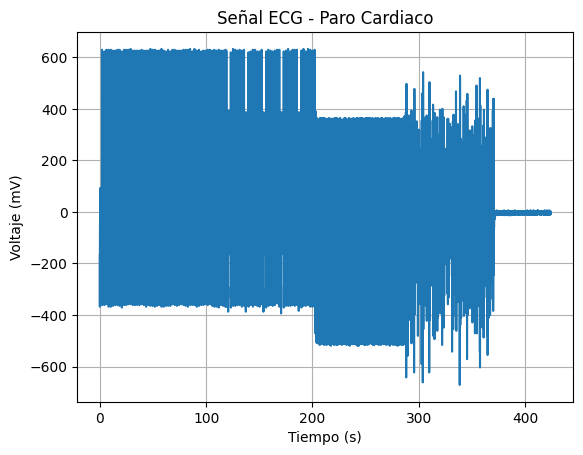

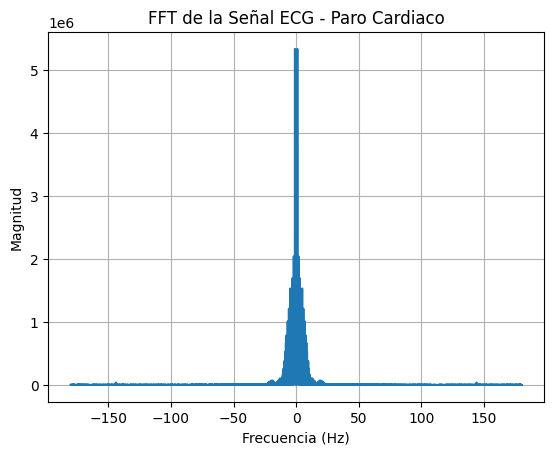

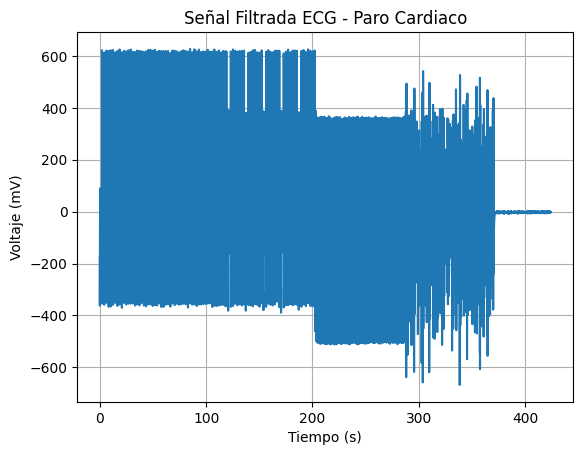

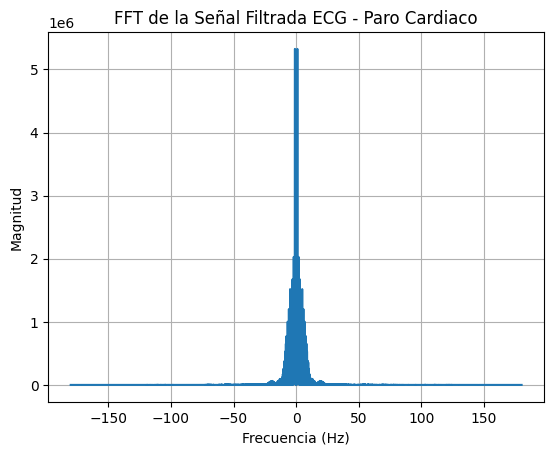

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def soft_threshold(coeff, threshold):
    return np.sign(coeff) * np.maximum(np.abs(coeff) - threshold, 0)

def get_frequency_bands(fs, levels):
    """Calculate frequency bands for each decomposition level."""
    bands = [(fs / (2**(level + 1)), fs / (2**level)) for level in range(levels)]
    return bands

Archivos = ["Reposo.txt", "Respiración Profunda Antes del Ejercicio.txt", "Después del Ejercicio.txt", "Respiración Profunda Después del Ejercicio.txt", "Paro Cardiaco.txt"]
for Archivo in Archivos:
  v = (np.loadtxt(Archivo)[:, -1]-507)/1023*3.3*1000
  fs = 360
  N = len(v)
  t = np.linspace(0, N/fs, N)
  plt.plot(t, v)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Señal ECG - '+Archivo.replace('.txt', ''))
  plt.grid()
  plt.show()

  #FFT
  f = np.linspace(-fs/2, fs/2, N)
  V = np.fft.fftshift(np.fft.fft(v))
  plt.plot(f, abs(V))
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Magnitud')
  plt.title('FFT de la Señal ECG - '+Archivo.replace('_', ' ').replace('.txt', '').title())
  plt.grid()
  plt.show()

  # Aplicar la Transformada Wavelet
  wavelet = 'db4'
  level = 8
  coeffs = pywt.wavedec(v, wavelet, level=level)

  # Calcular el umbral utilizando la desviación estándar de los coeficientes de detalle más finos
  sigma = np.median(np.abs(coeffs[-1])) / 0.6745
  threshold = sigma * np.sqrt(2 * np.log(len(v)))

  # Obtener las bandas de frecuencia para cada nivel de descomposición
  bands = get_frequency_bands(fs, level)

  # Establecer en cero los coeficientes correspondientes al rango de 0.15 a 0.5 Hz
  for i, (low, high) in enumerate(bands):
    if low < 0.5 and high > 0.15:
      coeffs[i] = np.zeros_like(coeffs[i])

  # Filtrar los coeficientes
  filtered_coeffs = [soft_threshold(coeff, threshold) for coeff in coeffs]

  # Reconstrucción de la señal filtrada
  v_filtrada = pywt.waverec(filtered_coeffs, wavelet)
  plt.plot(t, v_filtrada)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Voltaje (mV)')
  plt.title('Señal Filtrada ECG - '+Archivo.replace('.txt', ''))
  plt.grid()
  plt.show()
  #FFT
  f = np.linspace(-fs/2, fs/2, N)
  V_filtrada = np.fft.fftshift(np.fft.fft(v_filtrada))
  plt.plot(f, abs(V_filtrada))
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Magnitud')
  plt.title('FFT de la Señal Filtrada ECG - '+Archivo.replace('_', ' ').replace('.txt', '').title())
  plt.grid()
  plt.show()